# ML1  Project - Avocado Pricing Dataset

#### Analysis done by Clifer Fernandez  - April 2020 cohort

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)<br/>
3. [Data Profiling](#section3)<br/>
    - 3.1 [Understanding the Dataset](#section301)<br/>
    - 3.2 [Pre Profiling](#section302)<br/>
    - 3.3 [Preprocessing](#section303)<br/>
    - 3.4 [Post Profiling](#section304)<br/>
4. [Exploratory Data Analysis](#section4)
    - 4.1 [Spread of datapoints as per year](#section401)<br/>
    - 4.2 [Distribution of the Target Variable - Average Price](#section402)<br/>
    - 4.3 [Volume Sale by Avocado grade](#section403)<br/>
    - 4.4 [Sale by Bag Size ](#section404)<br/>
    - 4.5 [Sale by Total Volume and Total Bags ](#section405)<br/>
    - 4.6 [Annual Variation in Average Price ](#section406)<br/>
    - 4.7 [Annual Variation in Average Price on basis of Type](#section407)<br/>
    - 4.8 [Annual Variation in Total Volume on basis of Type](#section408)<br/>
    - 4.9 [Average Price by Region](#section409)<br/>
    - 4.10 [Total Volume by Region](#section410)<br/>
    - 4.11 [Correlation Plots](#section411)<br/>
    - 4.12 [Correlation Heatmap](#section412)<br/>
5. [Feature Engineering](#section5)<br/>
    - 5.1 [Drop all High Corelation columns](#section501)<br/>
    - 5.2 ['One Hot Encoding' of Catagorical Data](#section502)<br/>
6. [Machine Learning Model Creation](#section6)<br/>  
    - 6.1 [Dataset Train / Test Split](#section601)<br/>
    - 6.2 [Standard Scaling](#section602)<br/>
    - 6.3 [Linear Regression Model](#section603)<br/>
    - 6.4 [Decision Tree Regressor](#section604)<br/>
    - 6.5 [Random Forest Regressor](#section605)<br/>
    - 6.6 [Hyperparameter Tuning](#section606)<br/>

7. [Conclusions](#section7)<br/>
    - 7.1 [Observations](#section701)<br/>
    - 7.2 [Model Evaluation Matrix](#section702)<br/>
8. [Recommendations](#section8)<br/>  

<a id=section1></a>

### 1. Problem Statement

A dataset containing the average price of a single avocado from various cities around the US was collected.

Detailed information on the various headers are described below in the data description.   

**Our task is to analyze the data and train a Machine Learning model that is able to predict the pricing**

<a id=section2></a>

### 2. Data Description and Loading

#### Dataset Description

| Column Name             | Description|
| :-----------------------|:-----------|
|Date | The date of the observation
|AveragePrice | The average price of a single avocado - target variable
|Total Volume | Total number of avocados sold - sum of the totals of each PLU
|4046 | Total number of avocados with PLU 4046 (Small/Medium Hass Avocado) sold
|4225 | Total number of avocados with PLU 4225 (Large Hass Avocado) sold
|4770 | Total number of avocados with PLU 4770 (Extra Large Hass Avocado) sold
|Total Bags| Total number of bags of avocados sold - Sum of all the sizes of bags sold
|Small Bags| Total number of small bags sold
|Large Bags| Total number of large bags sold
|XLarge Bags| Total number of extra large bags sold
|Type | Conventional or Organic - mode of farming
|Year | The year of observation
|Region | The city or region of the observation


#### Importing necessary packages

In [1]:
import numpy as np
np.set_printoptions(precision=4)                         # To display values only upto four decimal places. 

import pandas as pd
pd.set_option('mode.chained_assignment', None)             # To suppress pandas warnings.
pd.set_option('display.max_colwidth', None)                # To display all the data in each column
pd.options.display.max_columns = 200                       # To display every column of the dataset in head()

import pandas_profiling                                    # Pandas Profiling v2.9.0

from scipy import stats                                    # To run the Z score calculations if needed

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')                         # To apply seaborn whitegrid style to the plots.
%matplotlib inline

import seaborn as sns                                      # To adjust seaborn settings for the plots.
sns.set(style='whitegrid',
        palette="muted",                                   # Muted looks better for the charts!
        font_scale=1.3,                                  
        color_codes=True) 

import warnings
warnings.filterwarnings('ignore')                          # To suppress all the warnings in the notebook.



#### Importing Dataset

In [2]:
df_avo = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/avocado.csv", index_col=0)

<a id=section3></a>

## 3. Data Profiling

- In the following sections we will first __inspect our dataset__ using various pandas functionalities.
- Then with the help of __pandas profiling__ we will check if any columns of our dataset need preprocessing.
- In __preprocessing__ we will deal with any erronous and / or  missing values in the columns. 
- Re-run __pandas profiling__ to see how preprocessing has transformed our dataset.

<a id=section301></a>

### 3.1 Understanding the Dataset

###### Careful inspection of the dataset will allow gathering of valuble insights which will guide or way forward.

In [3]:
df_avo.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
df_avo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 11
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.9+ MB


In [5]:
df_avo.nunique() 

Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

In [6]:
df_avo.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

From the above preliminary data inspection we can gather the following:

- The data set consists of 18249 records with 13 columns
- There are no null or missing datapoints
- 10 columns have numeric data and 3 columns are catagorical in nature

<a id=section302></a>

### 3.2 Pre Profiling

- An __interactive HTML report__ using Pandas Profiling is generated which contains:
- Detailed information about each column 
- Coorelation between the data in the different columns
- Sample of dataset
- A visual interpretation of each column in the data
- Spread of the data can be better understood by the distribution plot. 
- Grannular level analysis of each column.

In [7]:
profile_default = df_avo.profile_report(title='Pandas Profiling before Data Preprocessing') 
profile_default.to_file(output_file="Avocado_Data_profiling_before_preprocessing.html")

__Pandas Profiling indicates the following:__

- Dataset has **NO duplicate rows or MISSING cells**
- Very High Standard Deviation in most of the data columns. These will have to be reviewed.
- The data columns **total volume, 4046, 4225, 4770, total bags, small bags, large bags and xlarge bags** have extremely high corelation to each other. This means that these variables have redundant information for model building and therefore only one of them ie: total volume, will be retained while the others will be dropped




<a id=section303></a>

### 3.3 Preprocessing

- Dealing with the type of data:
  - Review and Convert data to the relevant useful datatype
  - Split / Merge / Discard data as necessary
- Dealing with Outliers
  - From the Pandas Profiling, we deduce that there are outliers in the dataset that may skew our analysis.
  - Dealing with these will help with EDA only, as the model building will not require the specific columns containing the outliers

In [8]:
df_avo.columns   = map(str.lower, df_avo.columns)       # convert all column names to Lower Case

In [9]:
df_avo.columns

Index(['date', 'averageprice', 'total volume', '4046', '4225', '4770',
       'total bags', 'small bags', 'large bags', 'xlarge bags', 'type', 'year',
       'region'],
      dtype='object')

In [10]:
df_avo['region'].unique()   # List out the unique region names

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

__We have noticed that the region column has 'TotalUS' as a region. We need to check if this information is a summation of the the other data points for various regions. We will test this on the data collected for a single date__

In [11]:
df_avo[ (df_avo.region == 'TotalUS')]

,date,averageprice,total volume,4046,4225,4770,total bags,small bags,large bags,xlarge bags,type,year,region
0,2015-12-27,0.95,27297983.67,9626901.09,10197890.05,1184340.09,6288852.44,4850404.09,1252626.31,185822.04,conventional,2015,TotalUS
1,2015-12-20,0.98,25083647.17,8710021.76,9329861.85,1201020.01,5842743.55,4618389.66,1025048.77,199305.12,conventional,2015,TotalUS
2,2015-12-13,0.93,28041335.38,9855053.66,10805838.91,1016163.17,6364279.64,4964462.13,1371440.28,28377.23,conventional,2015,TotalUS
3,2015-12-06,0.89,28800396.57,9405464.36,12160838.62,931830.63,6302262.96,5005077.36,1233956.21,63229.39,conventional,2015,TotalUS
4,2015-11-29,0.99,22617999.38,8094803.56,9003178.41,731008.41,4789009.00,3901953.04,856560.34,30495.62,conventional,2015,TotalUS
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,2018-02-04,1.53,1384683.41,117922.52,287724.61,1703.52,977084.84,774695.74,201878.69,510.41,organic,2018,TotalUS
8,2018-01-28,1.61,1336979.09,118616.17,280080.34,1270.61,936859.49,796104.27,140652.84,102.38,organic,2018,TotalUS
9,2018-01-21,1.63,1283987.65,108705.28,259172.13,1490.02,914409.26,710654.40,203526.59,228.27,organic,2018,TotalUS
10,2018-01-14,1.59,1476651.08,145680.62,323669.83,1580.01,1005593.78,858772.69,146808.97,12.12,organic,2018,TotalUS


In [12]:
df_avo[(df_avo.date == '2018-02-04') & (df_avo.region == 'TotalUS')]

,date,averageprice,total volume,4046,4225,4770,total bags,small bags,large bags,xlarge bags,type,year,region
7,2018-02-04,0.87,62505646.52,21620180.90,20445501.03,1066830.22,19373134.37,13384586.80,5719096.61,269450.96,conventional,2018,TotalUS
7,2018-02-04,1.53,1384683.41,117922.52,287724.61,1703.52,977084.84,774695.74,201878.69,510.41,organic,2018,TotalUS


In [13]:
df_avo[(df_avo.date == '2018-02-04') & (df_avo.region != 'TotalUS')]

,date,averageprice,total volume,4046,4225,4770,total bags,small bags,large bags,xlarge bags,type,year,region
7,2018-02-04,1.03,216738.47,7625.65,195725.06,143.53,13244.23,10571.60,2422.63,250.00,conventional,2018,Albany
7,2018-02-04,0.86,957792.07,474887.68,55158.13,1755.05,425991.21,292317.81,131566.04,2107.36,conventional,2018,Atlanta
7,2018-02-04,1.12,1225103.27,139312.12,708495.55,5611.56,371684.04,369085.25,2512.13,86.66,conventional,2018,BaltimoreWashington
7,2018-02-04,1.07,128702.15,39582.33,8511.49,22490.26,58118.07,17470.72,40491.57,155.78,conventional,2018,Boise
7,2018-02-04,1.39,725934.21,21309.40,566751.03,3293.87,134579.91,98025.22,36068.02,486.67,conventional,2018,Boston
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,2018-02-04,1.69,6493.79,1328.38,666.47,0.00,4498.94,2696.67,1802.27,0.00,organic,2018,StLouis
7,2018-02-04,1.22,6294.16,85.22,152.09,0.00,6056.85,2847.48,3209.37,0.00,organic,2018,Syracuse
7,2018-02-04,1.32,7363.56,89.59,440.31,0.00,6833.66,6827.78,5.88,0.00,organic,2018,Tampa
7,2018-02-04,1.41,283378.47,22474.66,55360.49,133.41,205409.91,70232.59,134666.91,510.41,organic,2018,West


In [14]:
df_avo[(df_avo.date == '2015-11-29') & (df_avo.region == 'TotalUS')].sum()[['total volume']]

total volume    2.31258e+07
dtype: object

In [15]:
df_avo[(df_avo.date == '2015-11-29') & (df_avo.region != 'TotalUS')].sum()[['total volume']]

total volume    3.83526e+07
dtype: object

__Since the data from the other region do not add up to the value in 'TotalUS' we are assuming that this information is a summation of all the info that is NOT from the specific mentioned regions. As such we will retain this informaton for the moment and deal with it later__

- Convert date information to the proper data format
- Extract the month and day from the date

In [16]:
df_avo['date']   = pd.to_datetime(df_avo['date'])         # Convert "date" data type from object to datetime 
df_avo['month']  = df_avo.date.dt.month   
df_avo['day']    = df_avo.date.dt.day   

- Conversion of the data type to Categorical or Integer as relevant

In [17]:
df_avo.columns

Index(['date', 'averageprice', 'total volume', '4046', '4225', '4770',
       'total bags', 'small bags', 'large bags', 'xlarge bags', 'type', 'year',
       'region', 'month', 'day'],
      dtype='object')

In [18]:
df_avo['type']   = pd.Categorical(df_avo['type'])
df_avo['year']   = pd.Categorical(df_avo['year'])
df_avo['region'] = pd.Categorical(df_avo['region'])
df_avo['day']    = pd.Categorical(df_avo['day'])
df_avo['month']  = pd.Categorical(df_avo['month'])

convcols = ['total volume', '4046', '4225', '4770','total bags',
            'small bags', 'large bags', 'xlarge bags']

df_avo[convcols]= df_avo[convcols].astype(int)

df_avo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 11
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          18249 non-null  datetime64[ns]
 1   averageprice  18249 non-null  float64       
 2   total volume  18249 non-null  int64         
 3   4046          18249 non-null  int64         
 4   4225          18249 non-null  int64         
 5   4770          18249 non-null  int64         
 6   total bags    18249 non-null  int64         
 7   small bags    18249 non-null  int64         
 8   large bags    18249 non-null  int64         
 9   xlarge bags   18249 non-null  int64         
 10  type          18249 non-null  category      
 11  year          18249 non-null  category      
 12  region        18249 non-null  category      
 13  month         18249 non-null  category      
 14  day           18249 non-null  category      
dtypes: category(5), datetime64[ns](1), floa

In [19]:
df_avo.columns

Index(['date', 'averageprice', 'total volume', '4046', '4225', '4770',
       'total bags', 'small bags', 'large bags', 'xlarge bags', 'type', 'year',
       'region', 'month', 'day'],
      dtype='object')

In [20]:
df_avo.head()

,date,averageprice,total volume,4046,4225,4770,total bags,small bags,large bags,xlarge bags,type,year,region,month,day
0,2015-12-27,1.33,64236,1036,54454,48,8696,8603,93,0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876,674,44638,58,9505,9408,97,0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220,794,109149,130,8145,8042,103,0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992,1132,71976,72,5811,5677,133,0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039,941,43838,75,6183,5986,197,0,conventional,2015,Albany,11,29


In [21]:
round(df_avo.describe(),1) 

,averageprice,total volume,4046,4225,4770,total bags,small bags,large bags,xlarge bags
count,18249.0,18249.0,18249.0,18249.0,18249.0,18249.0,18249.0,18249.0,18249.0
mean,1.4,850643.5,293007.9,295154.1,22839.4,239638.7,182194.2,54337.7,3106.3
std,0.4,3453545.4,1264989.1,1204120.4,107464.0,986242.4,746178.5,243965.9,17692.8
min,0.4,84.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,1.1,10838.0,854.0,3008.0,0.0,5088.0,2849.0,127.0,0.0
50%,1.4,107376.0,8645.0,29061.0,184.0,39743.0,26362.0,2647.0,0.0
75%,1.7,432962.0,111020.0,150206.0,6243.0,110783.0,83337.0,22029.0,132.0
max,3.2,62505646.0,22743616.0,20470572.0,2546439.0,19373134.0,13384586.0,5719096.0,551693.0


- __Very high SD seen in the data. This is most likely due to the data for 'TotalUS' and some of the regions which cover a large area.__

<a id=section304></a>

## 3.4 Post Profiling

In [22]:
profile_default = df_avo.profile_report(title='Pandas Profiling after Data Preprocessing') 
profile_default.to_file(output_file="Avocado_Data_profiling_after_preprocessing.html")

<a id=section4></a>

## 4 Exploratory Data Analysis

<a id=section401></a>

### 4.1 Spread of datapoints as per year

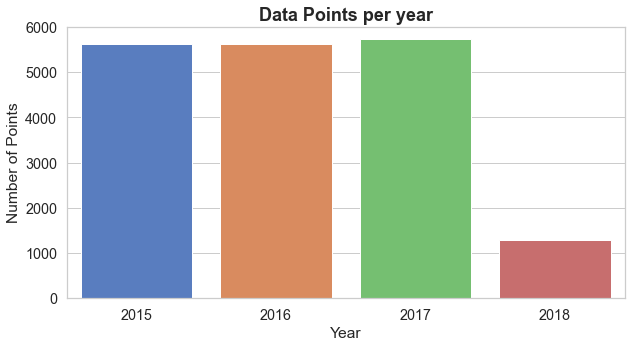

In [23]:
df_avo.year.value_counts()

plt.figure(figsize=(10,5))
figA = sns.countplot(data = df_avo, x = 'year',).set_title("Data spread by Year")
plt.title("Data Points per year",fontsize=18,fontweight="bold")
plt.xlabel('Year')
plt.ylabel('Number of Points')
plt.show()

- The dataset consists of records for 3 full years 2015 - 2017 and Q1 of 2018

<a id=section402></a>

### 4.2 Distribution of the Target Variable - Average Price

Text(0, 0.5, 'Frequency')

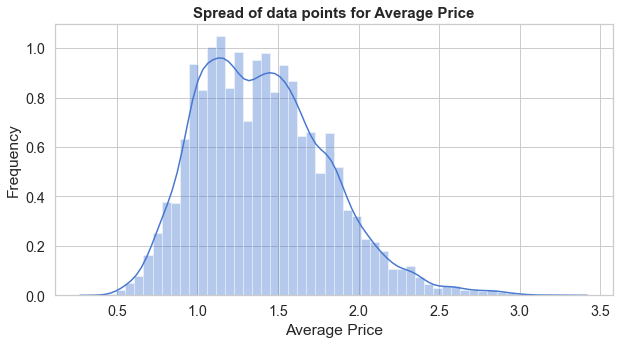

In [24]:
# Data spread for Average Price which is our Target Variable

plt.figure(figsize=(10,5))
fig1 = sns.distplot(df_avo['averageprice'])
plt.title("Spread of data points for Average Price",fontsize=15,fontweight="bold")
plt.xlabel('Average Price')
plt.ylabel('Frequency')
# plt.show()

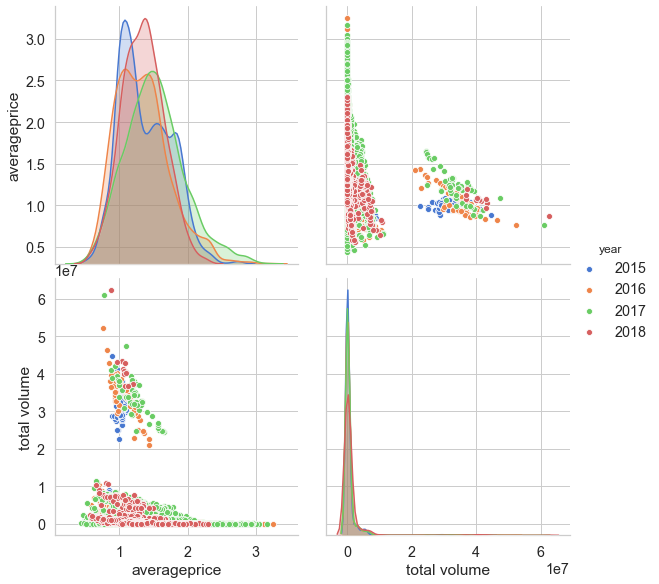

In [25]:
# Crossplot to visualize the distribution of average price per year

fig2 = sns.pairplot(data = df_avo,x_vars= ['averageprice','total volume'],
                    y_vars=['averageprice','total volume'], hue = 'year', size= 4,)

- Average Price is Normally Distributed. Most common pricing **ranges from 1.0 - 1.5**
- The high skewness of the total volume is due to the datapoint for region = 'TotalUS'

<a id=section403></a>

### 4.3 Volume Sale by Avocado grade

<AxesSubplot:xlabel='year,month'>

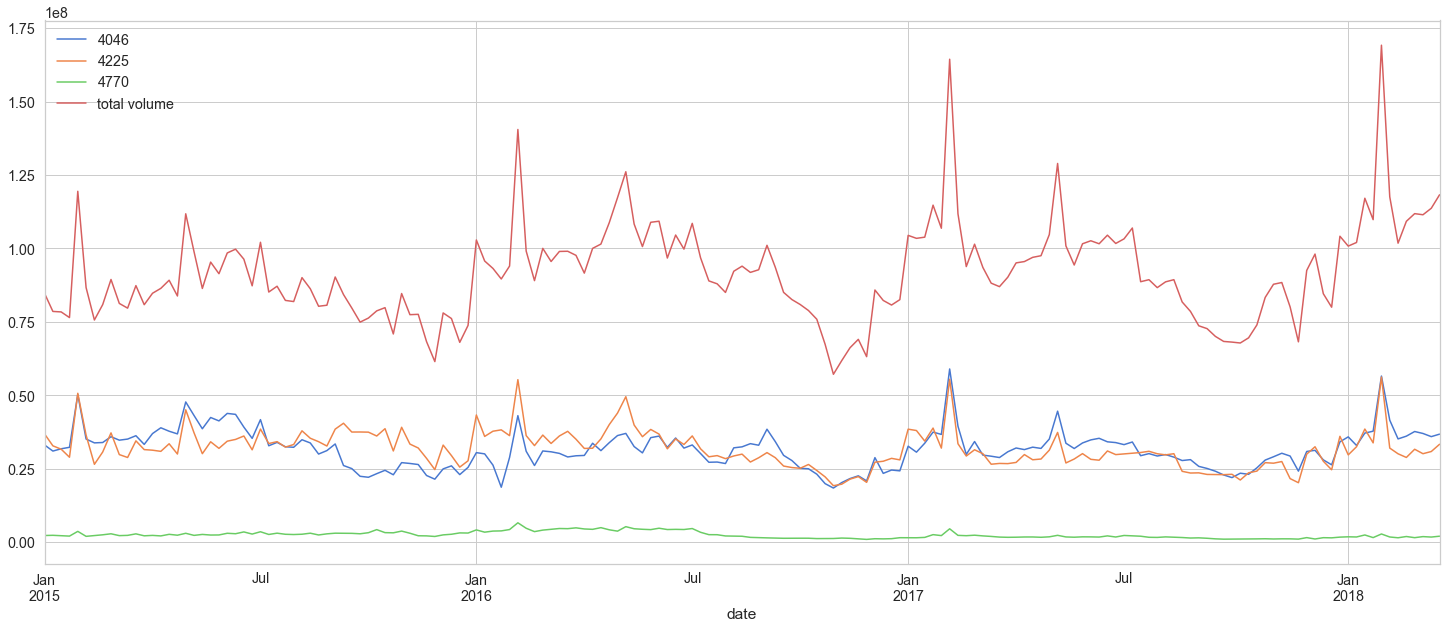

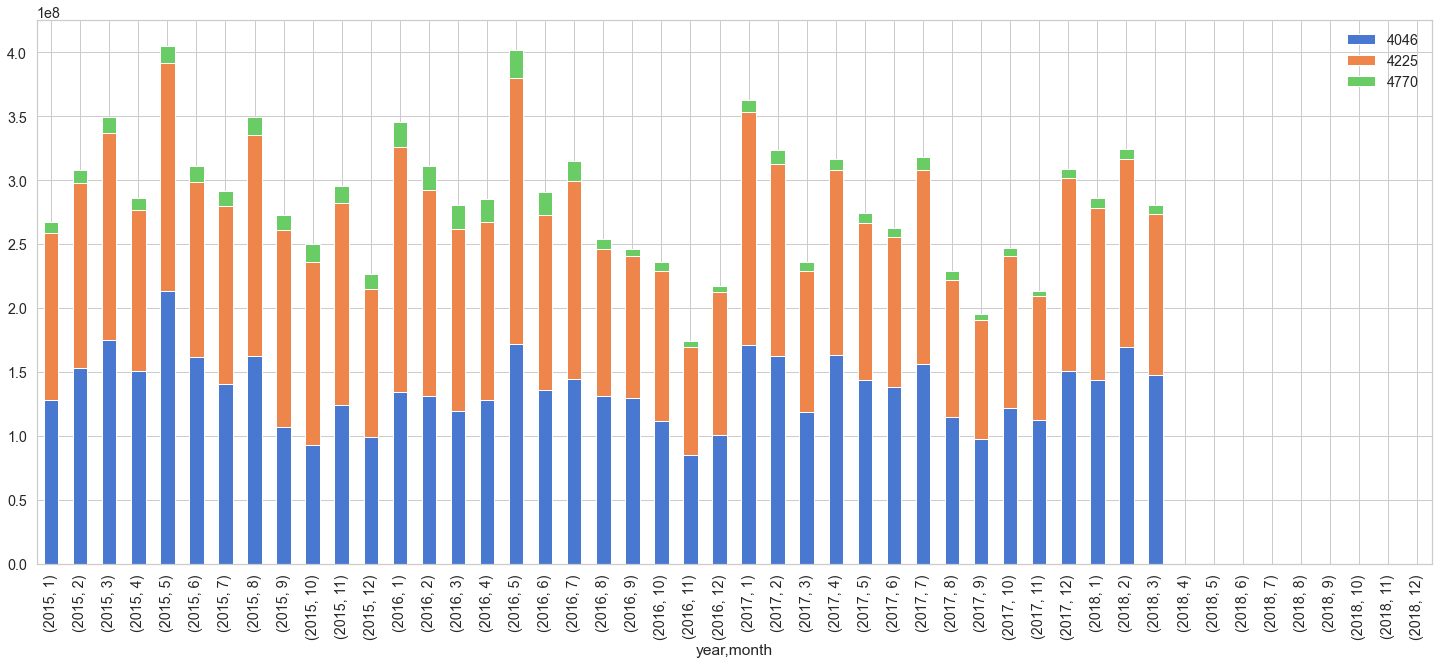

In [26]:
# Charts to visualize the volumes sale 

fig3 = df_avo.groupby(['date']).sum()[['4046','4225','4770','total volume']]
fig3.plot.line(figsize=(25, 10))

fig4 = df_avo.groupby(['year','month']).sum()[['4046','4225','4770']]
fig4.plot.bar(figsize=(25, 10), stacked = True)

- Small/Medium sized avocados (PLU 4046) sell much more than Large (PLU 4225)
- XL sized (PLU 4770) avocados sell in very low quantities

<a id=section404></a>

### 4.4 Sale by Bag Size

<AxesSubplot:xlabel='year,month'>

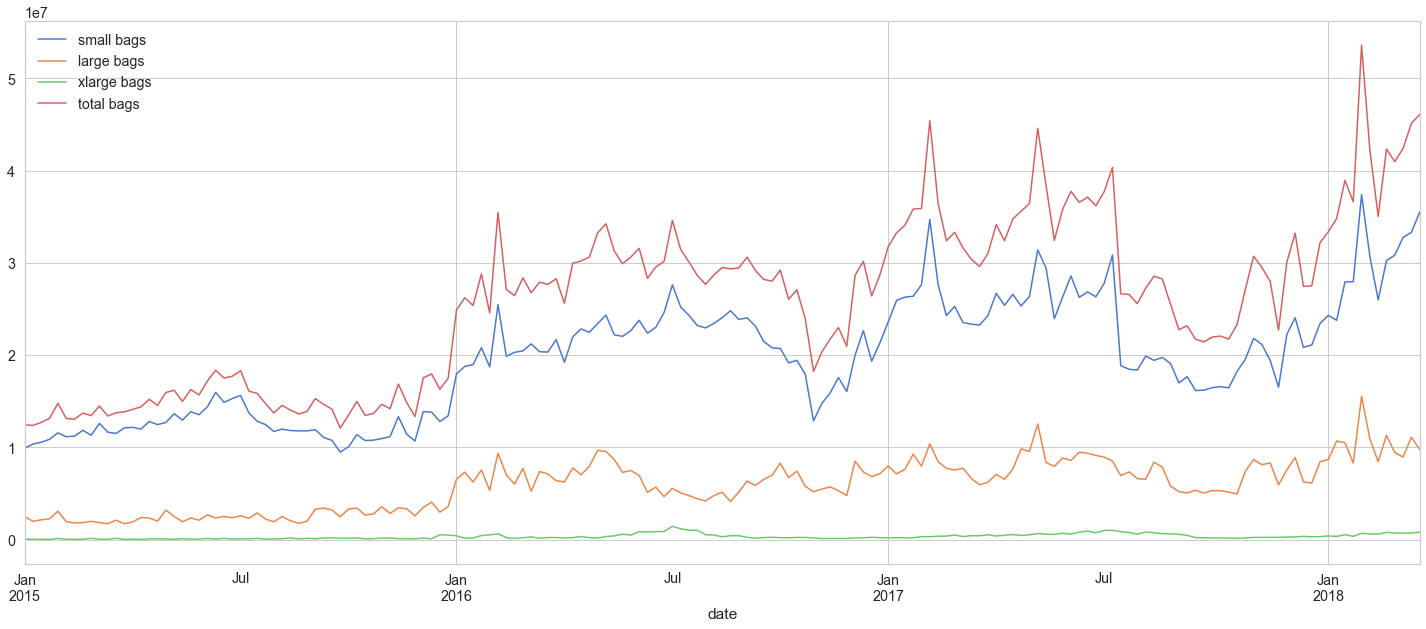

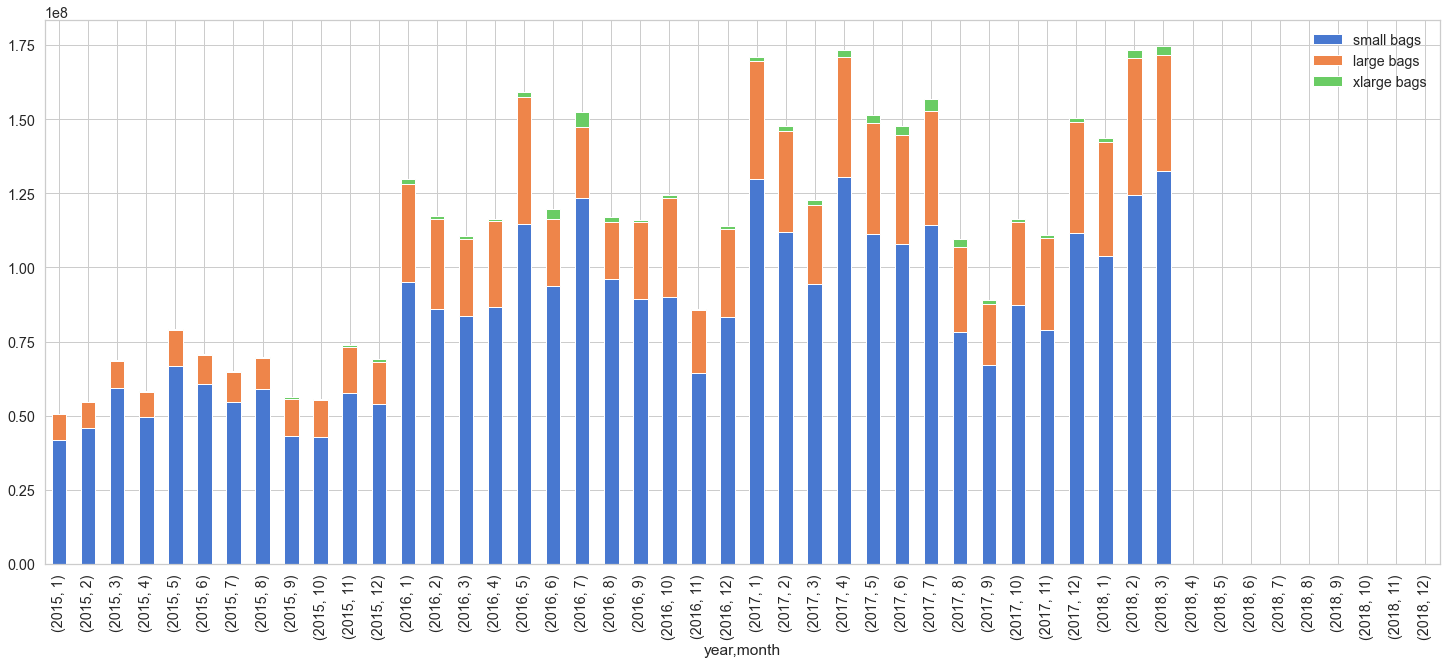

In [27]:
# Charts to visualize the preferred bag size

fig5 = df_avo.groupby(['date']).sum()[['small bags', 'large bags', 'xlarge bags', 'total bags']]
fig5.plot.line(figsize=(25, 10))

fig6 = df_avo.groupby(['year','month']).sum()[['small bags', 'large bags', 'xlarge bags']]
fig6.plot.bar(figsize=(25, 10),stacked = True)

- Small bag size is the most preferred size for purchase

<a id=section405></a>

### 4.5 Sale by Total Volume and Total Bags 

<AxesSubplot:xlabel='year,month'>

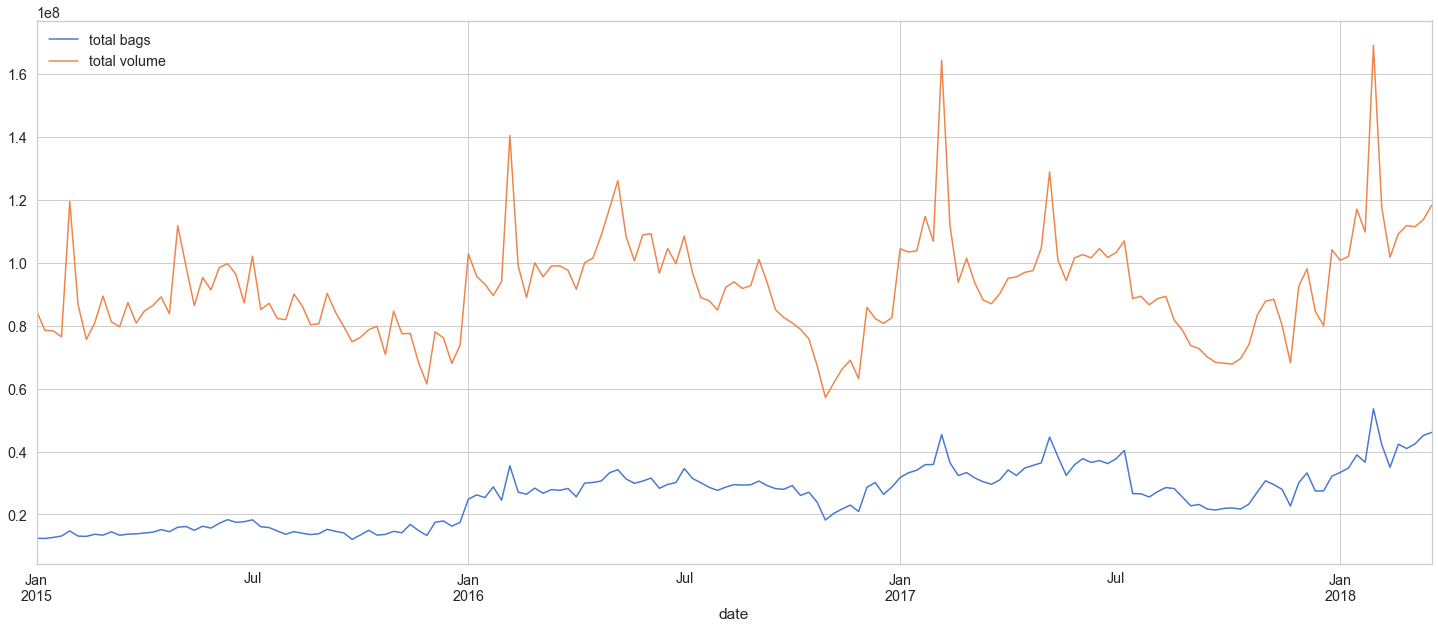

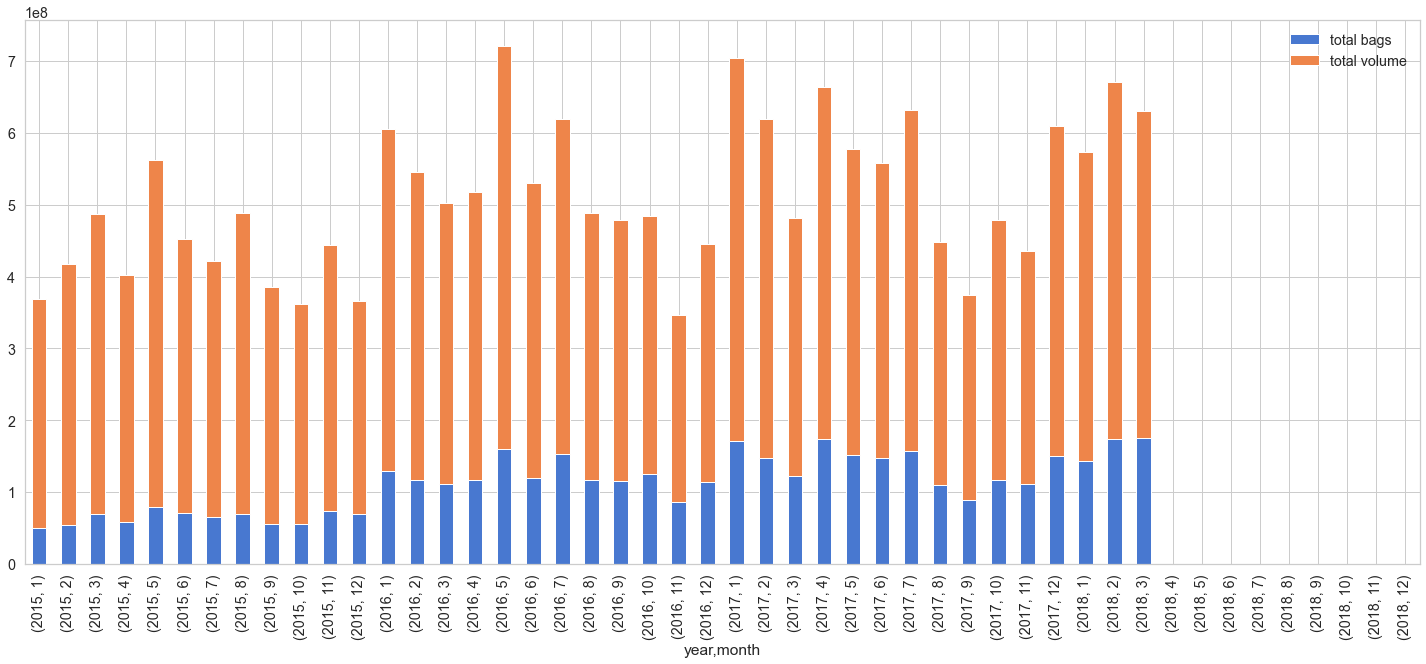

In [28]:
# Charts to visualize the total volumes

fig7 = df_avo.groupby(['date']).sum()[['total bags', 'total volume']]
fig7.plot.line(figsize=(25, 10))

fig8 = df_avo.groupby(['year','month']).sum()[['total bags', 'total volume']]
fig8.plot.bar(figsize=(25, 10), stacked = True)

- Year on Year the sale quantities are showing an increasing trend

<a id=section406></a>

### 4.6 Annual Variation in Average Price 

In [29]:
df_avo.groupby(['month','year']).median()[['averageprice']].unstack()

averageprice                     
year          2015   2016   2017   2018
month                                  
1            1.280  1.215  1.230  1.380
2            1.290  1.190  1.170  1.340
3            1.290  1.170  1.355  1.325
4            1.360  1.135  1.460    NaN
5            1.290  1.140  1.505    NaN
6            1.335  1.250  1.500    NaN
7            1.280  1.330  1.495    NaN
8            1.370  1.360  1.625    NaN
9            1.395  1.380  1.760    NaN
10           1.290  1.490  1.700    NaN
11           1.250  1.490  1.485    NaN
12           1.230  1.260  1.370    NaN

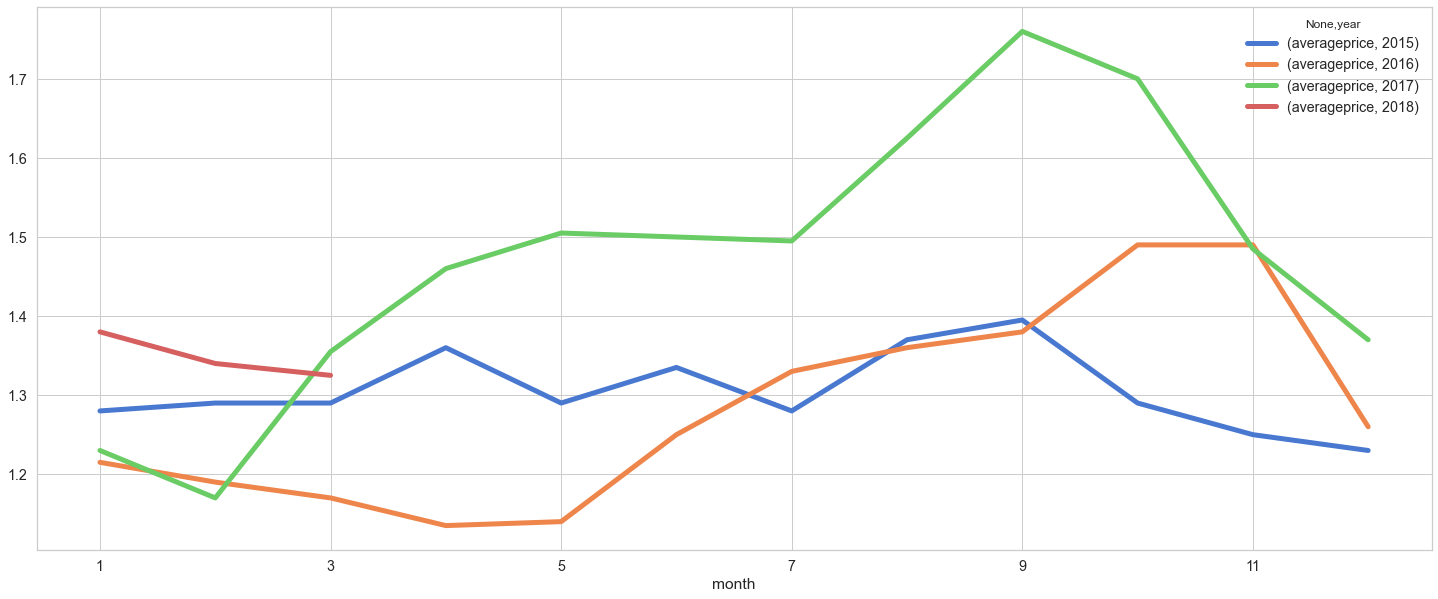

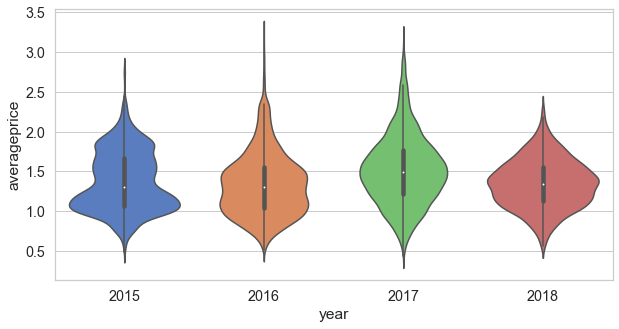

In [30]:
# Chart to visualize the annual average price variations

fig9 = df_avo.groupby(['month','year']).median()[['averageprice']].unstack()
fig9.plot.line(figsize=(25, 10),linewidth=5)

plt.figure(figsize=(10,5))
fig9a = sns.violinplot(data=df_avo,y='averageprice',x="year")

- The yearly average pricing seems to peak in September / October
- The spike in prices in 2017 waas related to a very poor harvest
    - https://money.cnn.com/2017/09/09/news/economy/avocado-prices-soar/index.html
    - https://www.bbc.com/news/business-39768480

<a id=section407></a>

### 4.7 Annual Variation in Average Price on basis of Type

In [31]:
df_avo.groupby(['month','type']).median()[['averageprice']].unstack()

averageprice        
type  conventional organic
month                     
1            1.060   1.530
2            1.020   1.540
3            1.110   1.540
4            1.120   1.580
5            1.060   1.560
6            1.135   1.640
7            1.190   1.690
8            1.190   1.755
9            1.230   1.830
10           1.310   1.760
11           1.180   1.680
12           1.060   1.570

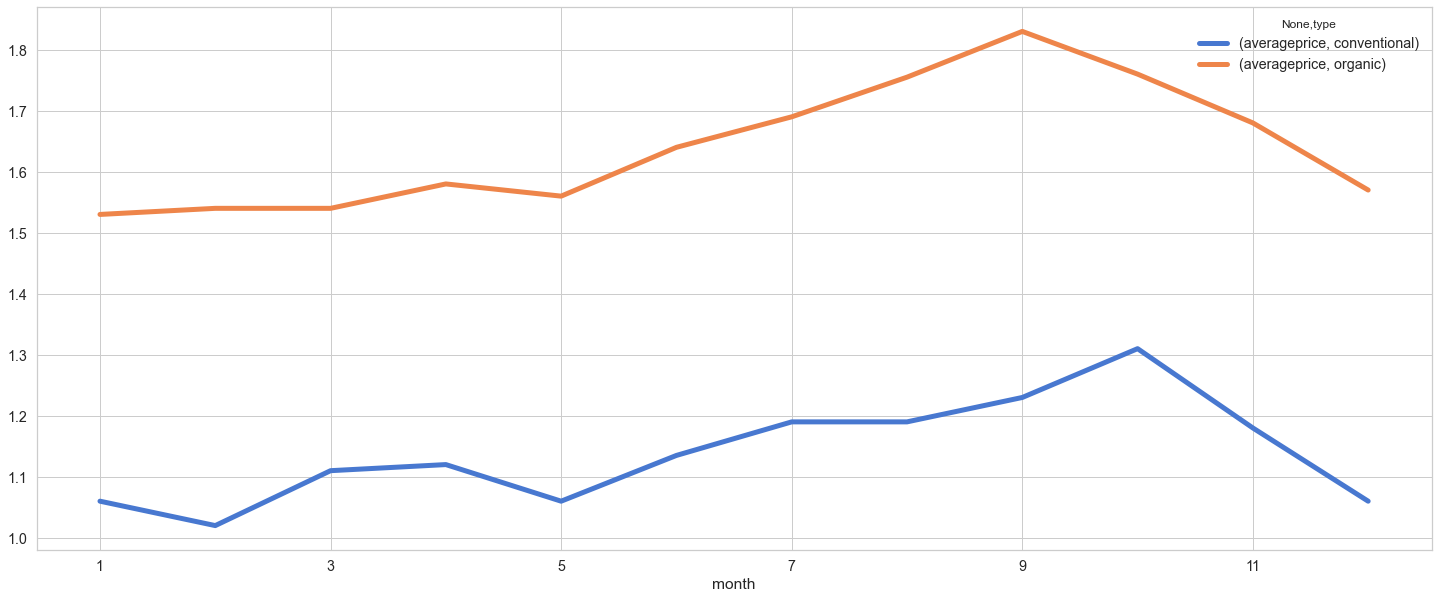

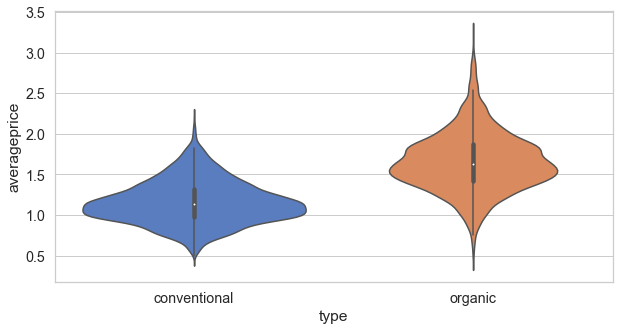

In [32]:
# Charts to visualize the average price variations by type

fig10 = df_avo.groupby(['month','type']).median()[['averageprice']].unstack()
fig10.plot.line(figsize=(25, 10),linewidth=5)


plt.figure(figsize=(10,5))
fig11 = sns.violinplot(data=df_avo,y='averageprice',x="type")

- Organic avocados are much more expensive than Conventional avocados
- This is a direct consequence of the higher farming costs associated with Organic Farming methods

<a id=section408></a>

### 4.8 Annual Variation in Total Volume on basis of Type

<AxesSubplot:xlabel='month'>

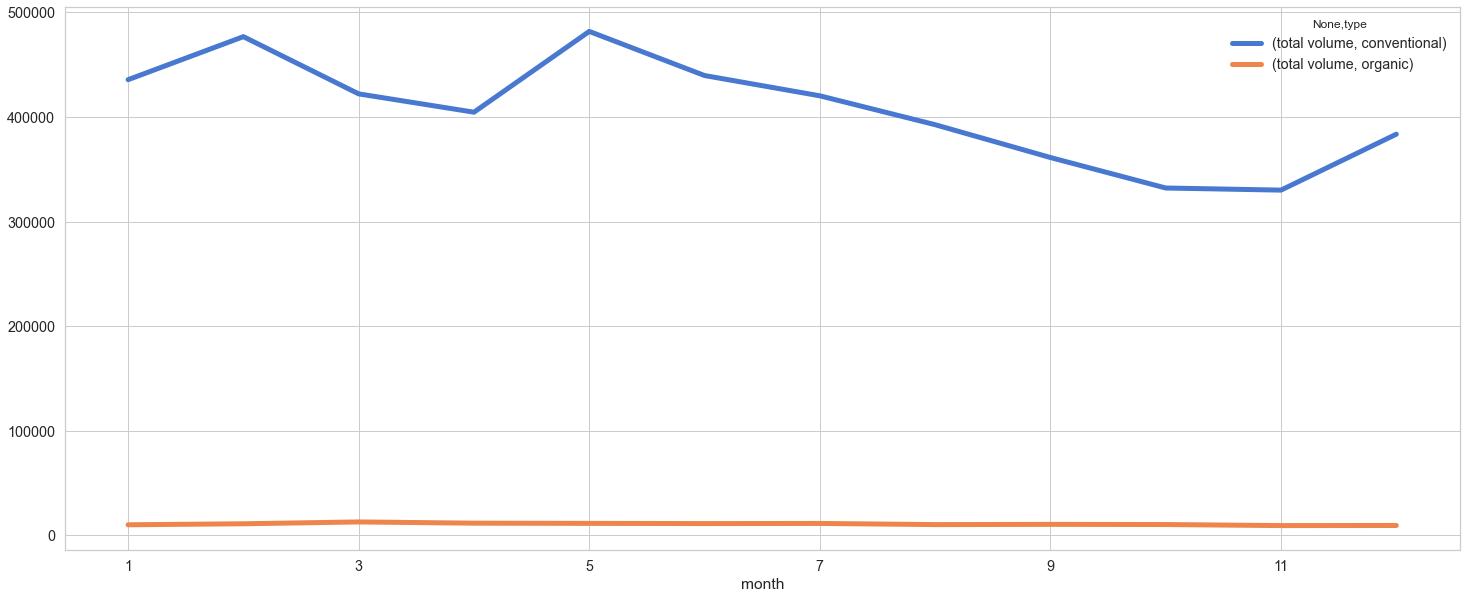

In [33]:
# Chart to visualize the total volume variations by type

fig12 = df_avo.groupby(['month','type']).median()[['total volume']].unstack()
fig12.plot.line(figsize=(25, 10),linewidth=5)

- Conventional avocados are very much in demand
- Organic avocados are a very 'niche' sale item

<a id=section409></a>

### 4.9 Average Price by Region

<AxesSubplot:xlabel='None,region'>

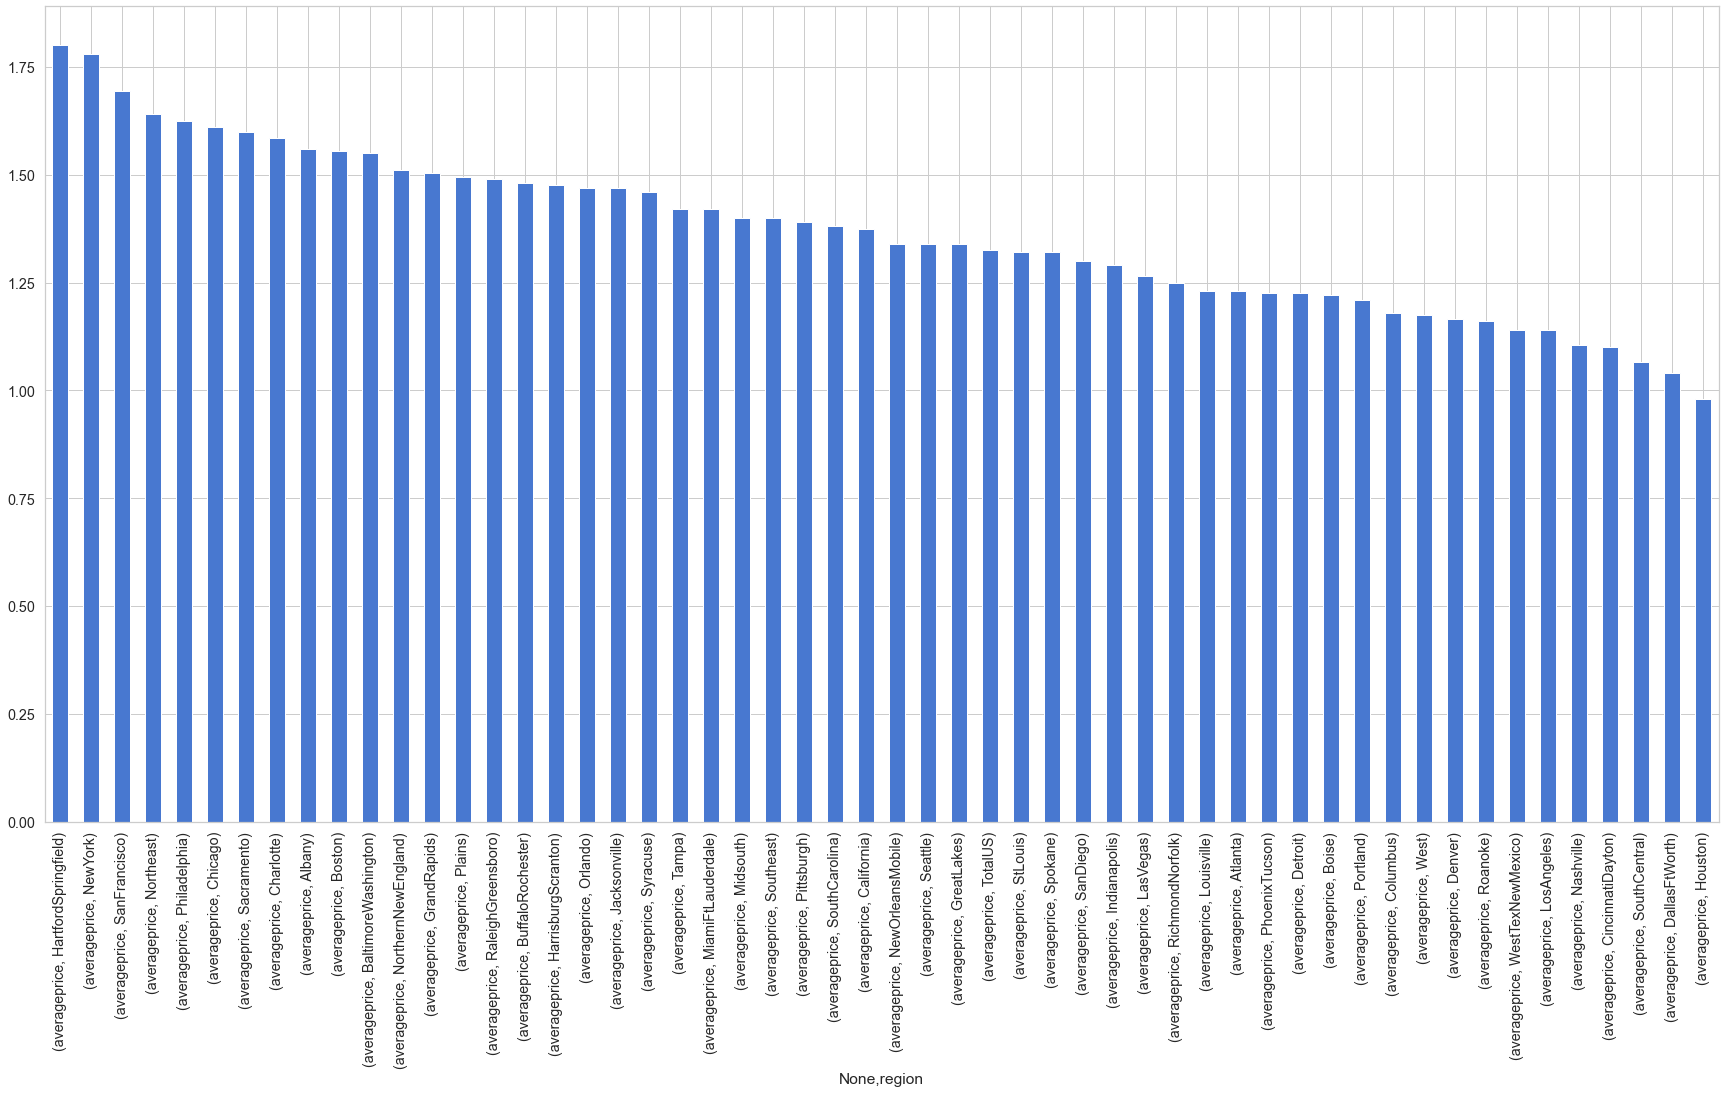

In [34]:
# Chart to visualize the average price variations by region

fig13 = df_avo.groupby(['region']).median()[['averageprice']].unstack().sort_values(ascending = False)
fig13.plot.bar(figsize=(30, 15))

- Top 5 cities with highest average prices
     - Hartford Springfield
     - New York
     - San Francisco
     - Philadelphia
     - Chicago

The Northest was not considered as it is a region rather than a city


<a id=section410></a>

### 4.10 Total Volume by Region

<AxesSubplot:xlabel='None,region'>

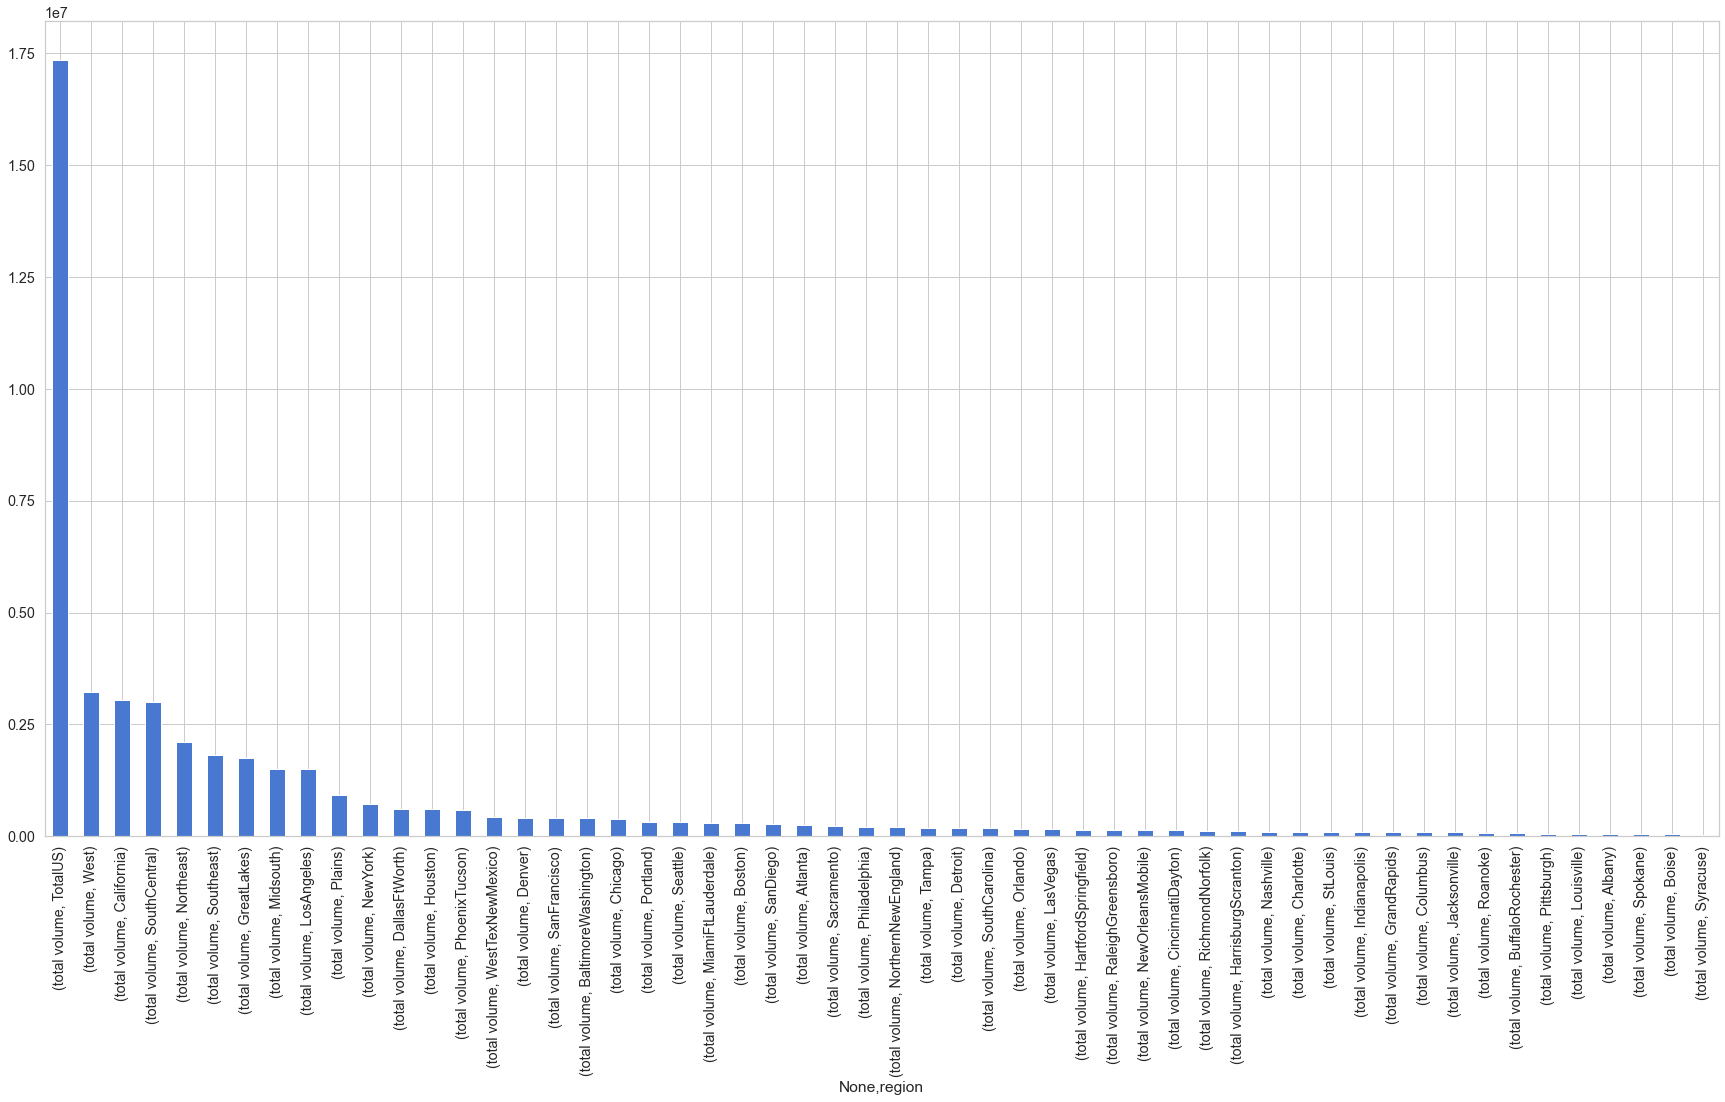

In [35]:
# Chart to visualize the total volume variations by type

fig14 = df_avo.groupby(['region']).mean()[['total volume']].unstack().sort_values(ascending = False)
fig14.plot.bar(figsize=(30, 15))

- Top 5 cities with highest volume sales
     - Los Angeles
     - New York
     - Dallas 
     - Houston
     - Phoenix
     
The graph shows other areas with more sales volume but they are regional numbers rather than city numbers.

<a id=section411></a>

### 4.11 Correlation Plots

In [36]:
df_avo.columns

Index(['date', 'averageprice', 'total volume', '4046', '4225', '4770',
       'total bags', 'small bags', 'large bags', 'xlarge bags', 'type', 'year',
       'region', 'month', 'day'],
      dtype='object')

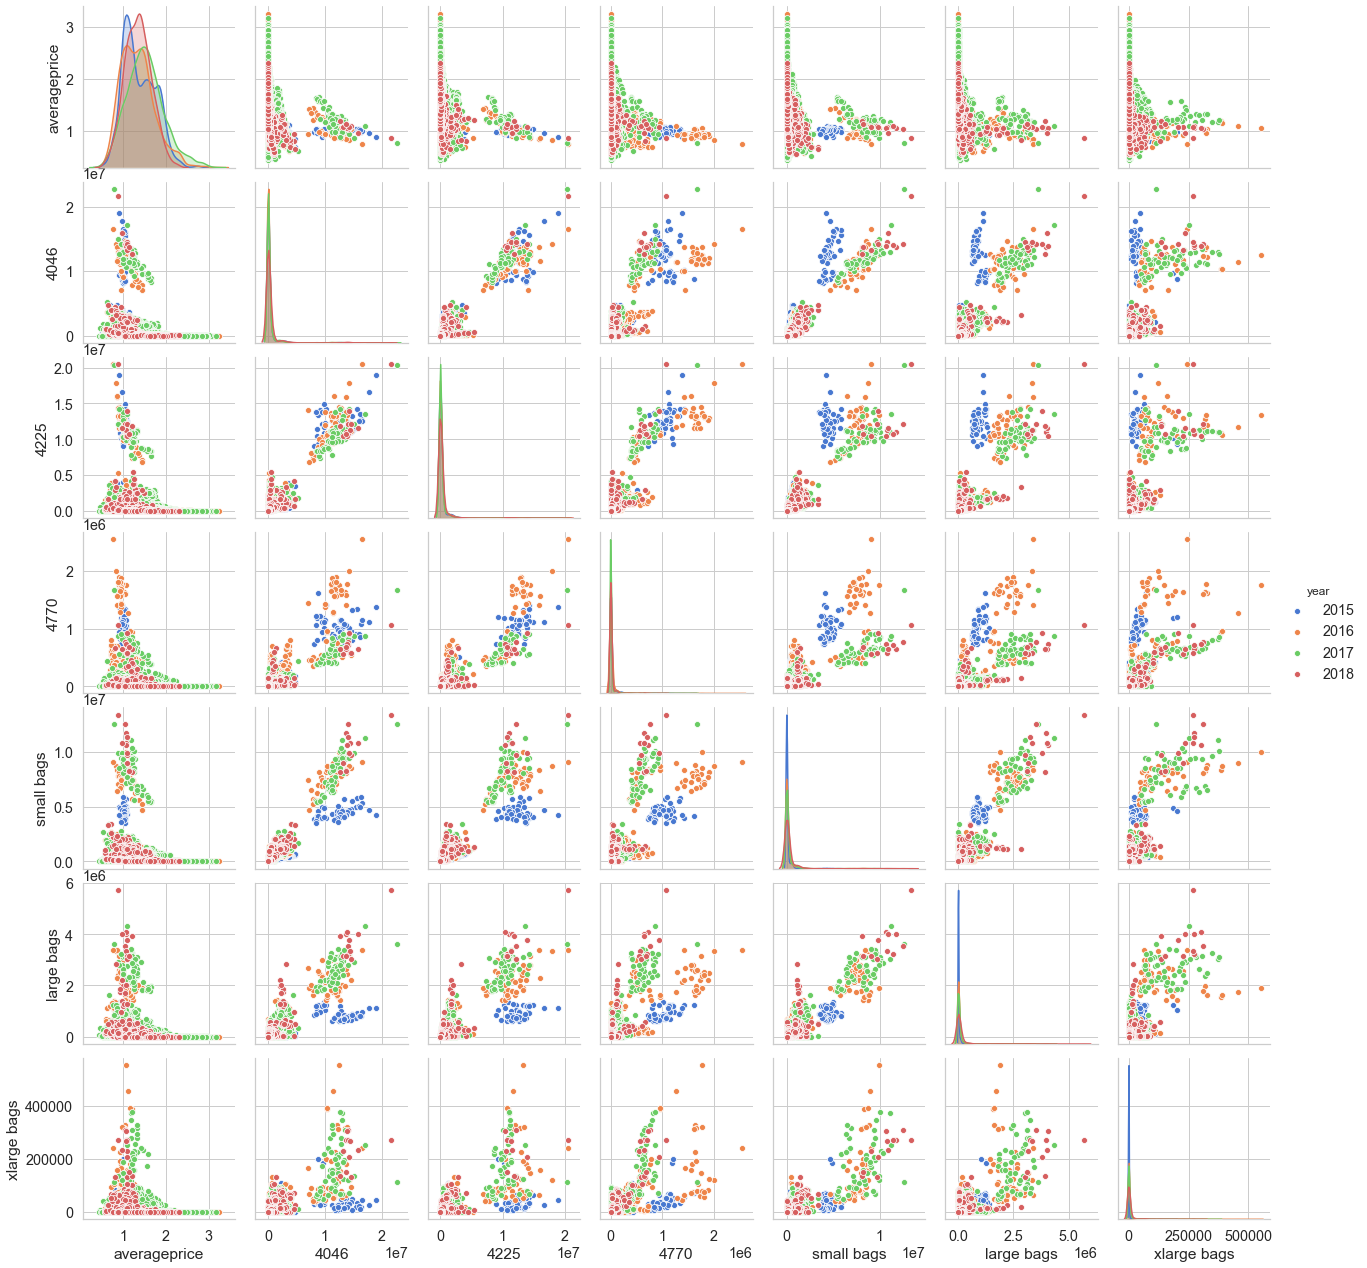

In [37]:
# Crossplot to visualize the interactions of the various data variables
pltgrp = ['averageprice', '4046', '4225', '4770','small bags', 'large bags', 'xlarge bags']
fig15=sns.pairplot(data=df_avo, x_vars= pltgrp, y_vars= pltgrp,diag_kind='kde',hue='year')

- Strong correlation seen between the variables

<a id=section412></a>

### 4.12 Correlation Heatmap

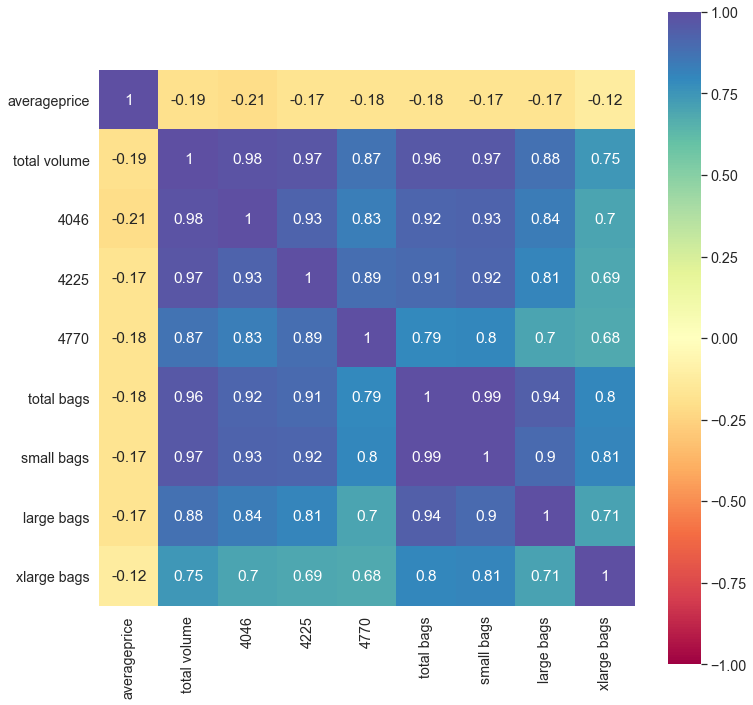

In [38]:
# Variable corelation heatmap

plt.figure(figsize=(12,12))
fig16 = sns.heatmap(round(df_avo.corr(),4), vmin= -1,annot = True, square = True, cmap = 'Spectral')

- The Strong correlation between variables confirmed with the correlation heatmap

<a id=section5></a>

## 5 Feature Engineering

<a id=section501></a>

### 5.1 Drop all High Correlation columns

In [39]:
remcols = ['date','4046', '4225', '4770','total bags', 'small bags', 'large bags', 'xlarge bags']

df_avo = df_avo.drop(columns=remcols)

df_avo.head()

,averageprice,total volume,type,year,region,month,day
0,1.33,64236,conventional,2015,Albany,12,27
1,1.35,54876,conventional,2015,Albany,12,20
2,0.93,118220,conventional,2015,Albany,12,13
3,1.08,78992,conventional,2015,Albany,12,6
4,1.28,51039,conventional,2015,Albany,11,29


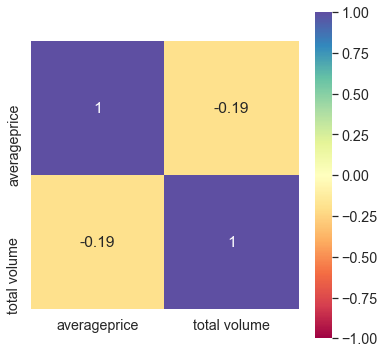

In [40]:
plt.figure(figsize=(6,6))
fig17 = sns.heatmap(round(df_avo.corr(),4), vmin= -1,annot = True, square = True, cmap = 'Spectral')

In [41]:
df_avo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 11
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   averageprice  18249 non-null  float64 
 1   total volume  18249 non-null  int64   
 2   type          18249 non-null  category
 3   year          18249 non-null  category
 4   region        18249 non-null  category
 5   month         18249 non-null  category
 6   day           18249 non-null  category
dtypes: category(5), float64(1), int64(1)
memory usage: 1.1 MB


<a id=section502></a>

### 5.2 'One Hot Encoding' of Catagorical Data

In [42]:
df_avo = pd.get_dummies(df_avo, columns=['type','day','month','year','region'], drop_first=True)

df_avo.columns

Index(['averageprice', 'total volume', 'type_organic', 'day_2', 'day_3',
       'day_4', 'day_5', 'day_6', 'day_7', 'day_8', 'day_9', 'day_10',
       'day_11', 'day_12', 'day_13', 'day_14', 'day_15', 'day_16', 'day_17',
       'day_18', 'day_19', 'day_20', 'day_21', 'day_22', 'day_23', 'day_24',
       'day_25', 'day_26', 'day_27', 'day_28', 'day_29', 'day_30', 'day_31',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12', 'year_2016',
       'year_2017', 'year_2018', 'region_Atlanta',
       'region_BaltimoreWashington', 'region_Boise', 'region_Boston',
       'region_BuffaloRochester', 'region_California', 'region_Charlotte',
       'region_Chicago', 'region_CincinnatiDayton', 'region_Columbus',
       'region_DallasFtWorth', 'region_Denver', 'region_Detroit',
       'region_GrandRapids', 'region_GreatLakes', 'region_HarrisburgScranton',
       'region_HartfordSpringfield', 'region_Houston', 'region

<a id=section6></a>

## 6 Machine Learning Model Creation

<a id=section601></a>

### Dataset Train / Test Split

In [43]:
X = df_avo.loc[:,df_avo.columns != 'averageprice']
y = df_avo.averageprice
print('X Shape: ', X.shape)
print('y shape: ', y.shape)

X Shape:  (18249, 99)
y shape:  (18249,)


In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

print('Shape of X_train: ', X_train.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of X_test: ', X_test.shape)
print('Shape of y_test: ', y_test.shape)

Shape of X_train:  (14599, 99)
Shape of y_train:  (14599,)
Shape of X_test:  (3650, 99)
Shape of y_test:  (3650,)


<a id=section602></a>

### Standard Scaling

In [45]:
from sklearn.preprocessing import StandardScaler      #import the class

scaler = StandardScaler()                             # cleate an object

scaler.fit(X_train)                                   #what should be the multiplication factor

StandardScaler()

In [46]:
X_train_s = scaler.transform(X_train)   

X_test_s = scaler.transform(X_test)

<a id=section603></a>

### Linear Regression Model

In [47]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train_s, y_train)

LinearRegression()

In [48]:
# Making predictions on the train set.

y_pred_train_LR = linreg.predict(X_train_s)
y_pred_train_LR[:10]

array([1.6717, 1.2594, 2.0175, 1.8196, 1.7805, 1.0557, 1.3586, 1.522 ,
       1.1902, 1.5848])

In [49]:
# Making predictions on the test set.

y_pred_test_LR = linreg.predict(X_test_s)
y_pred_test_LR[:10]

array([1.1748, 1.1634, 1.4282, 1.8944, 1.7272, 1.4809, 1.4327, 1.0606,
       2.014 , 1.3433])

In [50]:
# To get the intercept of the model.

linreg.intercept_

# To get the coefficients of the model.

coefs = linreg.coef_
features = X_train.columns

list(zip(features,coefs))

[('total volume', -0.005469688386403189),
 ('type_organic', 0.24816775317279438),
 ('day_2', 0.006660845949750856),
 ('day_3', 0.0042814191524235545),
 ('day_4', 0.001375724973687903),
 ('day_5', -0.011250852665451984),
 ('day_6', 0.010501452457799897),
 ('day_7', 0.0035145010592625495),
 ('day_8', 0.0008088770992089149),
 ('day_9', -0.0009606442675791499),
 ('day_10', 0.0046480497274298815),
 ('day_11', 0.0011685272548966567),
 ('day_12', -0.005568289574036257),
 ('day_13', 0.00898083913829864),
 ('day_14', 0.010998559384158196),
 ('day_15', 0.005525516631673465),
 ('day_16', 0.0038808874626808064),
 ('day_17', 0.011785805792560465),
 ('day_18', 0.005030880003870496),
 ('day_19', -0.004682930531144651),
 ('day_20', 0.010569309315821493),
 ('day_21', 0.013488706551162577),
 ('day_22', -0.0017674499837614654),
 ('day_23', 0.004567630359423761),
 ('day_24', 0.014106574185287796),
 ('day_25', 0.009054602311632482),
 ('day_26', -0.003806034891336338),
 ('day_27', 0.011729364450862912),
 ('

In [51]:
from sklearn import metrics

In [52]:
# Calculating the Mean Absolute Error on training and test set.

MAE_train_LR = metrics.mean_absolute_error(y_train, y_pred_train_LR)
MAE_test_LR = metrics.mean_absolute_error(y_test, y_pred_test_LR)

# Calculating the Mean Squared Error on training and test set.

MSE_train_LR = metrics.mean_squared_error(y_train, y_pred_train_LR)
MSE_test_LR = metrics.mean_squared_error(y_test, y_pred_test_LR)

# Calculating the Root Mean Squared Error on training and test set.

RMSE_train_LR = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train_LR))
RMSE_test_LR = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_LR))

# Calculating R squared value using the metrics.r2_score() method.

R_squared_train_LR = metrics.r2_score(y_train, y_pred_train_LR)
R_squared_test_LR = metrics.r2_score(y_test, y_pred_test_LR)

# Calculating Adjusted R squared value 
Adjusted_R_squared_train_LR = 1 - (1-R_squared_train_LR)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
Adjusted_R_squared_test_LR  = 1 - (1-R_squared_test_LR)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

In [53]:
print('MAE_LR for training set is: {} '.format(MAE_train_LR))
print('MAE_LR for test set is:     {}'.format(MAE_test_LR))

print('MSE_LR for training set is: {}'.format(MSE_train_LR))
print('MSE_LR for test set is:     {}'.format(MSE_test_LR))

print('RMSE for training set is: {}'.format(RMSE_train_LR))
print('RMSE for test set is:     {}'.format(RMSE_test_LR))

print('R squared value of the training set is: {}'.format(R_squared_train_LR))
print('R squared value of the test set is:     {}'.format(R_squared_test_LR))

print('ADJ R squared value of the training set is: {}'.format(Adjusted_R_squared_train_LR))
print('ADJ R squared value of the test set is:     {}'.format(Adjusted_R_squared_test_LR))

MAE_LR for training set is: 0.18030698391573033 
MAE_LR for test set is:     0.17971798597969685
MSE_LR for training set is: 0.05704204675258457
MSE_LR for test set is:     0.05703813973625806
RMSE for training set is: 0.2388347687263824
RMSE for test set is:     0.23882658925726435
R squared value of the training set is: 0.6499838135413805
R squared value of the test set is:     0.6408256000417665
ADJ R squared value of the training set is: 0.6475938830317314
ADJ R squared value of the test set is:     0.6308091871978607


<a id=section604></a>

### Decision Tree Regressor

In [54]:
from sklearn.tree import DecisionTreeRegressor

dtc = DecisionTreeRegressor( criterion='friedman_mse', random_state= 2)
dtc.fit(X_train_s, y_train)

DecisionTreeRegressor(criterion='friedman_mse', random_state=2)

In [55]:
y_pred_train_DTC = dtc.predict(X_train_s)  

y_pred_test_DTC = dtc.predict(X_test_s)     

In [56]:
# Calculating the Mean Absolute Error

MAE_train_DTC = metrics.mean_absolute_error(y_train, y_pred_train_DTC )
MAE_test_DTC   = metrics.mean_absolute_error(y_test, y_pred_test_DTC )

# Calculating the Mean Squared Error 

MSE_train_DTC  = metrics.mean_squared_error(y_train, y_pred_train_DTC )
MSE_test_DTC  = metrics.mean_squared_error(y_test, y_pred_test_DTC )

# Calculating the Root Mean Squared Error 

RMSE_train_DTC  = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train_DTC ))
RMSE_test_DTC   = np.sqrt( metrics.mean_squared_error(y_test, y_pred_test_DTC ))

# Calculating R- squared value on training 

R_squared_train_DTC  = metrics.r2_score(y_train, y_pred_train_DTC )
R_squared_test_DTC   = metrics.r2_score(y_test, y_pred_test_DTC )

# Calculating Adjusted R squared value 
Adjusted_R_squared_train_DTC = 1 - (1-R_squared_train_DTC)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
Adjusted_R_squared_test_DTC  = 1 - (1-R_squared_test_DTC)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

In [57]:
print('MAE_DTC of the training set is:  {}'.format(MAE_train_DTC))
print('MAE_DTC of the testing set is:   {}'.format(MAE_test_DTC))

print('MSE_DTC of the training set is:  {}'.format(MSE_train_DTC))
print('MSE_DTC of the testing set is:   {}'.format(MSE_test_DTC))

print('RMSE_DTC of the training set is:  {}'.format(RMSE_train_DTC))
print('RMSE_DTC of the testing set is:   {}'.format(RMSE_test_DTC))

print('R squared_DTC value of training set is:  {}'.format(R_squared_train_DTC))
print('R squared_DTC value of testing set is:   {}'.format(R_squared_test_DTC))

print('ADJ R squared value of the training set is: {}'.format(Adjusted_R_squared_train_DTC))
print('ADJ R squared value of the test set is:     {}'.format(Adjusted_R_squared_test_DTC))

MAE_DTC of the training set is:  4.1065856106417186e-19
MAE_DTC of the testing set is:   0.12744383561643835
MSE_DTC of the training set is:  7.598709829214657e-35
MSE_DTC of the testing set is:   0.038648904109589044
RMSE_DTC of the training set is:  8.717057891980905e-18
RMSE_DTC of the testing set is:   0.1965932453305277
R squared_DTC value of training set is:  1.0
R squared_DTC value of testing set is:   0.7566243042498699
ADJ R squared value of the training set is: 1.0
ADJ R squared value of the test set is:     0.749837207382472


<a id=section605></a>

### Random Forest Regressor

In [58]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(X_train_s,y_train)

RandomForestRegressor()

In [59]:
y_pred_train_RFR=rfr.predict(X_train_s)
y_pred_train_RFR[:10]

array([1.8386, 1.3148, 1.5151, 1.9265, 1.6822, 1.4273, 1.625 , 1.3182,
       1.3856, 1.3848])

In [60]:
# Making predictions on the test set.

y_pred_test_RFR = rfr.predict(X_test_s)
y_pred_test_RFR[:10]

array([1.0482, 0.9484, 1.3985, 1.8543, 1.6504, 1.4704, 1.4355, 1.2075,
       2.0169, 1.3552])

In [61]:
residual_RFR = y_pred_test_RFR - y_test
residual_RFR[:10]

12    0.0082
7    -0.0316
5     0.0085
7    -0.0157
43   -0.3196
0     0.1104
29   -0.0245
44    0.0275
5     0.2969
48    0.1252
Name: averageprice, dtype: float64

In [62]:
# Calculating the Mean Absolute Error.

MAE_train_RFR = metrics.mean_absolute_error(y_train, y_pred_train_RFR)
MAE_test_RFR  = metrics.mean_absolute_error(y_test, y_pred_test_RFR)

# Calculating the Mean Squared Error 

MSE_train_RFR = metrics.mean_squared_error(y_train, y_pred_train_RFR)
MSE_test_RFR = metrics.mean_squared_error(y_test, y_pred_test_RFR)

# Calculating the Root Mean Squared Error 

RMSE_train_RFR = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train_RFR))
RMSE_test_RFR  = np.sqrt( metrics.mean_squared_error(y_test, y_pred_test_RFR))

# Calculating R- squared value on training 

R_squared_train_RFR = metrics.r2_score(y_train, y_pred_train_RFR)
R_squared_test_RFR  = metrics.r2_score(y_test, y_pred_test_RFR)

# Calculating Adjusted R squared value 
Adjusted_R_squared_train_RFR = 1 - (1-R_squared_train_RFR)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
Adjusted_R_squared_test_RFR  = 1 - (1-R_squared_test_RFR)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

In [63]:
print('MAE_RFR of the training set is:  {}'.format(MAE_train_RFR))
print('MAE_RFR of the testing set is:   {}'.format(MAE_test_RFR))

print('MSE_RFR of the training set is:  {}'.format(MSE_train_RFR))
print('MSE_RFR of the testing set is:   {}'.format(MSE_test_RFR))

print('RMSE_RFR of the training set is:  {}'.format(RMSE_train_RFR))
print('RMSE_RFR of the testing set is:   {}'.format(RMSE_test_RFR))

print('R squared_RFR value of training set is:  {}'.format(R_squared_train_RFR))
print('R squared_RFR value of testing set is:   {}'.format(R_squared_test_RFR))

print('ADJ R squared value of the training set is: {}'.format(Adjusted_R_squared_train_RFR))
print('ADJ R squared value of the test set is:     {}'.format(Adjusted_R_squared_test_RFR))

MAE_RFR of the training set is:  0.03698564285225016
MAE_RFR of the testing set is:   0.10047172602739726
MSE_RFR of the training set is:  0.0029263914692787187
MSE_RFR of the testing set is:   0.020831804756164383
RMSE_RFR of the training set is:  0.05409613174043703
RMSE_RFR of the testing set is:   0.14433227205363458
R squared_RFR value of training set is:  0.982043344506821
R squared_RFR value of testing set is:   0.8688202138439292
ADJ R squared value of the training set is: 0.9819207354376559
ADJ R squared value of the test set is:     0.8651619606525345


<a id=section606></a>

### Hyperparameter Tuning

#### GridSearchCV - Random Forest Regressor

In [64]:
from sklearn.model_selection import GridSearchCV

# Number of trees in random forest
n_estimators = [10,50,100,200,300,500]
# Number of features to consider at every split
max_features = ['auto', 'log2',2,4,8,12]
# Maximum number of levels in tree
max_depth = [2,4,8,16,25]
max_depth.append(None)
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               }

In [65]:
rfr_grid = GridSearchCV(estimator = rfr, param_grid=random_grid, cv = 3, n_jobs = -1 )
rfr_grid.fit(X_train_s,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 8, 16, 25, None],
                         'max_features': ['auto', 'log2', 2, 4, 8, 12],
                         'n_estimators': [10, 50, 100, 200, 300, 500]})

In [66]:
rfr_grid.score(X_train_s,y_train)

0.982694800244865

In [67]:
rfr_grid.best_params_

{'max_depth': None, 'max_features': 'auto', 'n_estimators': 500}

In [68]:
y_pred_train_RFR_GSCV=rfr_grid.predict(X_train_s)
y_pred_train_RFR_GSCV[:10]

array([1.8465, 1.3264, 1.4858, 1.9102, 1.6707, 1.422 , 1.628 , 1.3286,
       1.3849, 1.3871])

In [69]:
y_pred_test_RFR_GSCV = rfr_grid.predict(X_test_s)
y_pred_test_RFR_GSCV[:10]

array([1.0378, 0.9567, 1.4052, 1.8442, 1.7208, 1.4483, 1.4487, 1.2082,
       2.0145, 1.3779])

In [70]:
residual_RFR_GSCV = y_pred_test_RFR_GSCV - y_test
residual_RFR_GSCV[:10]

12   -0.00220
7    -0.02330
5     0.01522
7    -0.02576
43   -0.24924
0     0.08834
29   -0.01128
44    0.02822
5     0.29446
48    0.14794
Name: averageprice, dtype: float64

In [71]:
# Calculating the Mean Absolute Error

MAE_train_RFR_GSCV = metrics.mean_absolute_error(y_train, y_pred_train_RFR_GSCV )
MAE_test_RFR_GSCV   = metrics.mean_absolute_error(y_test, y_pred_test_RFR_GSCV )

# Calculating the Mean Squared Error 

MSE_train_RFR_GSCV  = metrics.mean_squared_error(y_train, y_pred_train_RFR_GSCV )
MSE_test_RFR_GSCV  = metrics.mean_squared_error(y_test, y_pred_test_RFR_GSCV )

# Calculating the Root Mean Squared Error 

RMSE_train_RFR_GSCV  = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train_RFR_GSCV ))
RMSE_test_RFR_GSCV   = np.sqrt( metrics.mean_squared_error(y_test, y_pred_test_RFR_GSCV ))

# Calculating R- squared value on training 

R_squared_train_RFR_GSCV  = metrics.r2_score(y_train, y_pred_train_RFR_GSCV )
R_squared_test_RFR_GSCV   = metrics.r2_score(y_test, y_pred_test_RFR_GSCV )

# Calculating Adjusted R squared value 
Adjusted_R_squared_train_RFR_GSCV = 1 - (1-R_squared_train_RFR_GSCV)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
Adjusted_R_squared_test_RFR_GSCV  = 1 - (1-R_squared_test_RFR_GSCV)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

In [72]:
print('MAE_RFR_GSCV of the training set is:  {}'.format(MAE_train_RFR_GSCV))
print('MAE_RFR_GSCV of the testing set is:   {}'.format(MAE_test_RFR_GSCV))

print('MSE_RFR_GSCV of the training set is:  {}'.format(MSE_train_RFR_GSCV))
print('MSE_RFR_GSCV of the testing set is:   {}'.format(MSE_test_RFR_GSCV))

print('RMSE_RFR_GSCV of the training set is:  {}'.format(RMSE_train_RFR_GSCV))
print('RMSE_RFR_GSCV of the testing set is:   {}'.format(RMSE_test_RFR_GSCV))

print('R squared_RFR_GSCV value of training set is:  {}'.format(R_squared_train_RFR_GSCV))
print('R squared_RFR_GSCV value of testing set is:   {}'.format(R_squared_test_RFR_GSCV))

print('ADJ R squared value of the training set is: {}'.format(Adjusted_R_squared_train_RFR_GSCV))
print('ADJ R squared value of the test set is:     {}'.format(Adjusted_R_squared_test_RFR_GSCV))

MAE_RFR_GSCV of the training set is:  0.03655319405438742
MAE_RFR_GSCV of the testing set is:   0.10019408767123289
MSE_RFR_GSCV of the training set is:  0.0028202238973080345
MSE_RFR_GSCV of the testing set is:   0.020705730226082197
RMSE_RFR_GSCV of the training set is:  0.05310578026267983
RMSE_RFR_GSCV of the testing set is:   0.1438948582336499
R squared_RFR_GSCV value of training set is:  0.982694800244865
R squared_RFR_GSCV value of testing set is:   0.8696141167289404
ADJ R squared value of the training set is: 0.9825766393526822
ADJ R squared value of the test set is:     0.8659780033644798


<a id=section7></a>

## 7 Conclusions

<a id=section701></a>

### 7.1 Observations

#### Main Observations

- The data set consists of 18249 records with 13 columns
- There are no null or missing data points
- 10 columns have numeric data and 3 columns are categorical in nature

- Pandas Profiling indicates the following:
     - Very High Standard Deviation in most of the data columns
         - This deviation could be because of the region collated data that was present along with city data
     - 8 data columns have extremely high corelation to each other
     - Strong correlation seen between the variables
         - Confirmed with the corelation heatmap
         - These variables therefore have redundant information for model building
         - Only one of them ie: total volume, was retained for model building
        
- Exploratory Data analysis
    - The dataset consists of records for 3 full years,  2015 - 2017 and Q1 of 2018
    - Average Price is Normally Distributed. Most common pricing ranges from 1.0 - 1.5
    - The high skewness of the total volume is due to the datapoint for region = 'TotalUS'
    - Small/Medium sized avocados (PLU 4046) sell much more than Large (PLU 4225)
    - XL sized (PLU 4770) avocados sell in very low quantities
    - Small bag size is the most preferred size for purchase
    - Year on Year the sale quantities are showing an increasing trend
    - The yearly average pricing seems to peak in September / October
    - The spike in prices in 2017 waas related to a very poor harvest
        - https://money.cnn.com/2017/09/09/news/economy/avocado-prices-soar/index.html
        - https://www.bbc.com/news/business-39768480
	- Organic avocados are much more expensive than Conventional avocados
        - This is a direct consequence of the higher farming costs associated with Organic Farming methods
    - Conventional avocados are very much in demand
	- Organic avocados are a very 'niche' sale item


- Top 5 cities with highest average prices
   - Hartford Springfield
   - New York
   - San Francisco
   - Philadelphia
   - Chicago

The Northest was not considered as it is a region rather than a city

- Top 5 cities with highest volume sales
    - Los Angeles
    - New York
    - Dallas
    - Houston
    - Phoenix
    
The graph shows other areas with more sales volume but they are regional numbers rather than city numbers.








<a id=section702></a>

### 7.2 Model Evaluation Matrix


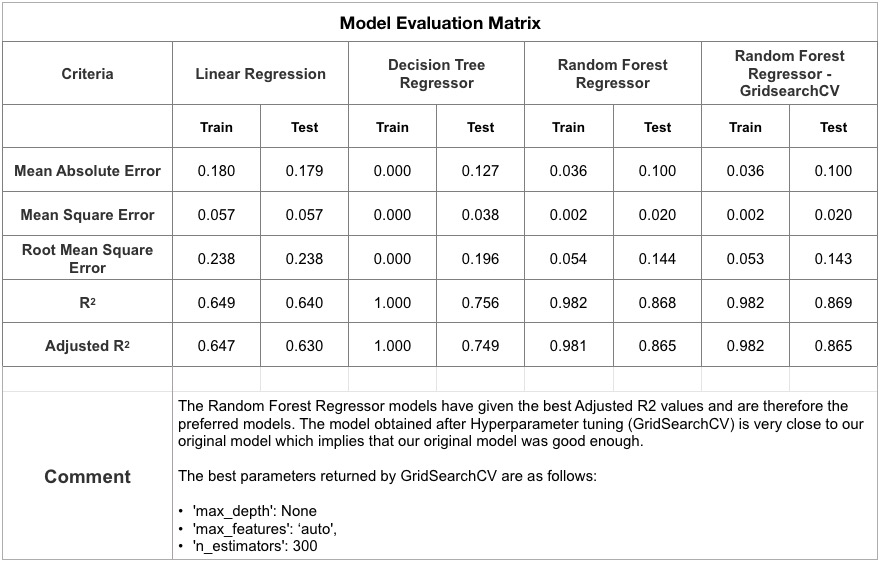



<a id=section8></a>

## 8 Recommendations

- Further improvements can be made on the model by using some **Feature Selection** methods or by using much more **powerful algorithms** like: 
  -  **Support Vector Machines (SVM)**
  - **Ensemble Learning Algorithms** 
  - **Artificial Neural Networks(ANNs)**
  - etc..